In [95]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [56]:
df_fake=pd.read_csv("Fake.csv")
df_true=pd.read_csv("True.csv")

In [93]:
df_fake.head(15)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",Fake
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",Fake
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",Fake
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",Fake
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",Fake


In [94]:
df_true.head(15)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Real
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",Real
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",Real
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",Real
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",Real
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",Real


In [59]:
df_fake["label"]='Fake'
df_true["label"]='Real'

In [60]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [61]:
df_merge= pd.concat([df_fake,df_true], axis=0)
df_merge.head(10)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",Fake
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",Fake
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",Fake
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",Fake
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",Fake


In [62]:
df_merge.shape

(44898, 5)

In [63]:
df = df_merge.sample(frac=1)

In [64]:
df.head(20)

,title,text,subject,date,label
506,"In The War Against ISIS, Trump Is Already Res...",I will confess: I belong to a faction of the l...,News,"August 23, 2017",Fake
16131,VENDING MACHINES FOR SYRINGES? This State Is T...,Do you think this is a good idea or is this en...,Government News,"Apr 15, 2017",Fake
11681,UK's May to visit China around Jan. 31: Sky News,(Reuters) - British Prime Minister Theresa May...,worldnews,"December 20, 2017",Real
10340,Lunatic MSNBC Reporter: “A paper trail leads d...,This guy is a joke! Scott Dworkin: A paper tr...,politics,"Jul 22, 2017",Fake
5988,House lawmaker seeks more documents in FDA cri...,WASHINGTON (Reuters) - A top U.S. lawmaker acc...,politicsNews,"January 26, 2017",Real
3319,Text: Ex-FBI Director Comey's prepared testimo...,(Reuters) - Following is the full text of form...,politicsNews,"June 7, 2017",Real
12185,"BLACK LAWYER, Editor Of Legal Website Writes: ...","Elie Mystal, an editor and contributor to the ...",politics,"Dec 9, 2016",Fake
3247,LOSER Donald Trump Will Be FURIOUS About Who ...,Get ready for the Donald Trump temper tantrum ...,News,"December 28, 2016",Fake
18753,Fear of volcanic eruption on Bali forces nearl...,"KARANGASEM, Indonesia (Reuters) - Nearly 135,0...",worldnews,"September 28, 2017",Real
8156,A Hedge Fund Exploiting Death And Destruction...,Progressive hero Alan Grayson is best known as...,News,"February 12, 2016",Fake


In [65]:
x=df.text
x.head()

506      I will confess: I belong to a faction of the l...
16131    Do you think this is a good idea or is this en...
11681    (Reuters) - British Prime Minister Theresa May...
10340    This guy is a joke! Scott Dworkin:  A paper tr...
5988     WASHINGTON (Reuters) - A top U.S. lawmaker acc...
Name: text, dtype: object

In [66]:
y=df.label
y.head()

506      Fake
16131    Fake
11681    Real
10340    Fake
5988     Real
Name: label, dtype: object

In [67]:
port_stem= PorterStemmer()

def PreProcessing(x):
  content = re.sub('[^a-zA-z]',' ', x)
  content = content.lower()
  content = content.split()
  content = [port_stem.stem(word) for word in content if not word in stopwords.words('english')]
  content = ' '.join(content)
  return content

In [68]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [69]:
x=x.apply(PreProcessing)

In [70]:
print(x)

506      confess belong faction left hate war context t...
16131    think good idea enabl addict la vega bet new a...
11681    reuter british prime minist theresa may visit ...
10340    guy joke scott dworkin paper trail lead direct...
5988     washington reuter top u lawmak accus food drug...
                               ...                        
20504    london reuter north korea reckless behavior gl...
7029     go citi home late night show air televis guess...
9468     first ladi melania trump tour beij zoo great w...
18128    bochum germani reuter year old spi known germa...
11093    last accus could nail coffin bill reilli spoke...
Name: text, Length: 44898, dtype: object


In [71]:
#splitting the data into training and testing sets
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=7)

In [72]:
x_train

7070     milwauke reuter green parti presidenti candid ...
12009                            rememb pelosi said afford
11428    make netherland great one geert wilder campaig...
8611     philadelphia reuter billionair environment act...
5086     doubt trump campaign full meltdown mode nuclea...
                               ...                        
6163     donald trump strategi defeat hillari clinton l...
17829    yesterday actor ben affleck came statement sho...
8788     washington reuter puerto rico u commonwealth r...
16604    hagu reuter organ identifi ten thousand victim...
8283     mexico citi reuter mexican senat propos legisl...
Name: text, Length: 35918, dtype: object

In [73]:
y_train

7070     Real
12009    Fake
11428    Fake
8611     Real
5086     Fake
         ... 
6163     Fake
17829    Fake
8788     Real
16604    Real
8283     Real
Name: label, Length: 35918, dtype: object

In [74]:
x_test

10625    rep steve scalis shot wednesday morn alexandri...
586      washington reuter u presid donald trump would ...
19661    know biggest threat integr vote presid democra...
13976    brussel reuter ireland need elect talk term br...
20422    amarillo texa home mideast migrant give amaril...
                               ...                        
1556     former secretari state condoleezza rice sat in...
14675    church organ church organ take million taxpay ...
17264    differ set law appli illeg fact appear law app...
1032     one thing go american peopl trump assault dece...
12957    brussel reuter belgian polic commission cather...
Name: text, Length: 8980, dtype: object

In [75]:
y_test

10625    Fake
586      Real
19661    Fake
13976    Real
20422    Fake
         ... 
1556     Fake
14675    Fake
17264    Fake
1032     Fake
12957    Real
Name: label, Length: 8980, dtype: object

TFIDF vectorization

In [76]:
tfidf= TfidfVectorizer(max_df=0.7)
tfidf_train = tfidf.fit_transform(x_train)
tfidf_test = tfidf.transform(x_test)

In [77]:
tfidf_train

<35918x82178 sparse matrix of type '<class 'numpy.float64'>'
	with 5416027 stored elements in Compressed Sparse Row format>

In [78]:
tfidf_test

<8980x82178 sparse matrix of type '<class 'numpy.float64'>'
	with 1335814 stored elements in Compressed Sparse Row format>

Passive Aggressive Classiefier

In [79]:
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)
y_pred_PAC=pac.predict(tfidf_test)

In [80]:
y_pred_PAC

array(['Fake', 'Real', 'Real', ..., 'Fake', 'Fake', 'Real'], dtype='<U4')

KNN Classifier

In [101]:
knn= KNeighborsClassifier()
knn.fit(tfidf_train, y_train)
y_pred_KNN=knn.predict(tfidf_test)

In [82]:
y_pred_KNN

array(['Fake', 'Real', 'Fake', ..., 'Fake', 'Fake', 'Fake'], dtype=object)

Multinomial Naive Bayes

In [83]:
mnb=MultinomialNB()
mnb.fit(tfidf_train,y_train)
y_pred_MNB=mnb.predict(tfidf_test)

In [84]:
y_pred_MNB

array(['Fake', 'Real', 'Real', ..., 'Fake', 'Fake', 'Real'], dtype='<U4')

Logistic Regression

In [85]:
lr=LogisticRegression()
lr.fit(tfidf_train,y_train)
y_pred_LR=lr.predict(tfidf_test)

In [86]:
y_pred_LR

array(['Fake', 'Real', 'Real', ..., 'Fake', 'Fake', 'Real'], dtype=object)

In [87]:
def f1(y_test,y_pred):
  a=confusion_matrix(y_test, y_pred, labels=["Real", "Fake"])
  tn=a[0][0]
  fp=a[0][1]
  fn=a[1][0]
  tp=a[1][1]
  p=(tp/(tp+fp))*100
  r=(tp/(tp+fn))*100
  f1_score=2*(p*r/(p+r))
  return (p,r,f1_score,a)

Calculating Accuracy, Precision, Recall, F1_score

Accuracy for KNN Classifier: 70.16703786191538 %
Precision for KNN Classifier: 64.04842342342343 %
Recall for KNN Classifier: 97.32620320855615 %
f1_score for KNN Classifier: 77.25613379743612 %


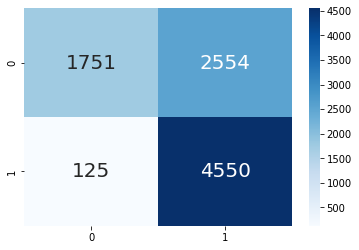

In [88]:
score_for_KNN=accuracy_score(y_test,y_pred_KNN)*100
print('Accuracy for KNN Classifier:',score_for_KNN,'%')
precision_KNN,recall_KNN,f1_score_KNN,a=f1(y_test,y_pred_KNN)
print('Precision for KNN Classifier:',precision_KNN,'%')
print('Recall for KNN Classifier:',recall_KNN,'%')
print('f1_score for KNN Classifier:',f1_score_KNN,'%')
sns.heatmap(a,annot=True,cmap="Blues",fmt="d",cbar=True,annot_kws={"size":20})

Accuracy for Passive Agressive Classifier: 99.39866369710467 %
Precision for Passive Aggressive Classifier Classifier: 99.38020944646291 %
Recall for Passive Aggressive Classifier Classifier: 99.46524064171123 %
f1_score for Passive Aggressive Classifier Classifier: 99.42270686337396 %


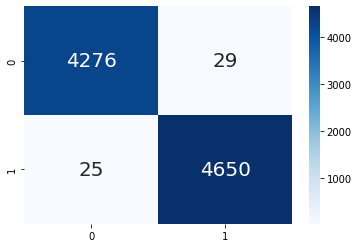

In [89]:
score_for_PAC=accuracy_score(y_test, y_pred_PAC)*100
print('Accuracy for Passive Agressive Classifier:',score_for_PAC,'%')
precision_PAC,recall_PAC,f1_score_PAC,b=f1(y_test,y_pred_PAC)
print('Precision for Passive Aggressive Classifier Classifier:',precision_PAC,'%')
print('Recall for Passive Aggressive Classifier Classifier:',recall_PAC,'%')
print('f1_score for Passive Aggressive Classifier Classifier:',f1_score_PAC,'%')
sns.heatmap(b,annot=True,cmap="Blues",fmt="d",cbar=True,annot_kws={"size":20})

Accuracy for Multinomial Naive Bayes Classifier: 93.00668151447663 %
Precision for Multinomial Naive Bayes Classifier: 92.41249214001257 %
Recall for Multinomial Naive Bayes Classifier: 94.31016042780749 %
f1_score for Multinomial Naive Bayes Classifier: 93.35168325217023 %


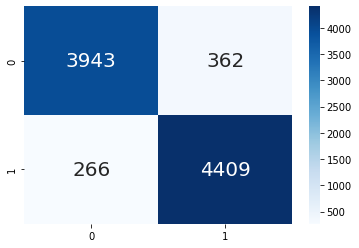

In [90]:
score_for_MNB=accuracy_score(y_test,y_pred_MNB)*100
print('Accuracy for Multinomial Naive Bayes Classifier:',score_for_MNB,'%')
precision_MNB,recall_MNB,f1_score_MNB,c=f1(y_test,y_pred_MNB)
print('Precision for Multinomial Naive Bayes Classifier:',precision_MNB,'%')
print('Recall for Multinomial Naive Bayes Classifier:',recall_MNB,'%')
print('f1_score for Multinomial Naive Bayes Classifier:',f1_score_MNB,'%')
sns.heatmap(c,annot=True,cmap="Blues",fmt="d",cbar=True,annot_kws={"size":20})

Accuracy for Logistic Regression Classifier: 98.4966592427617 %
Precision for Logistic Regression Classifier: 98.56653829696191 %
Recall for Logistic Regression Classifier: 98.54545454545455 %
f1_score for Logistic Regression Classifier: 98.55599529361429 %


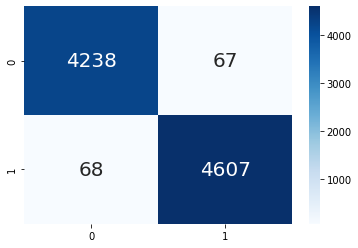

In [91]:
score_for_LR=accuracy_score(y_test,y_pred_LR)*100
print('Accuracy for Logistic Regression Classifier:',score_for_LR,'%')
precision_LR,recall_LR,f1_score_LR,d=f1(y_test,y_pred_LR)
print('Precision for Logistic Regression Classifier:',precision_LR,'%')
print('Recall for Logistic Regression Classifier:',recall_LR,'%')
print('f1_score for Logistic Regression Classifier:',f1_score_LR,'%')
sns.heatmap(d,annot=True,cmap="Blues",fmt="d",cbar=True,annot_kws={"size":20})